In [3]:
import numpy as np # linear algebra
import matplotlib.pylab as plt

import pandas as pd # data processing
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

In [4]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving 3.csv to 3.csv
Saving 2.csv to 2.csv
Saving 1.csv to 1.csv
Saving 0.csv to 0.csv


In [5]:
df0 = pd.read_csv("./0.csv", header=None )
df1 = pd.read_csv("./1.csv", header=None )
df2 = pd.read_csv("./2.csv", header=None )
df3 = pd.read_csv("./3.csv", header=None )
df = pd.concat([df0,df1,df2,df3], axis = 0)
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-23.0,-4.0,-1.0,1.0,2.0,-4.0,2.0,-20.0,0.0,1.0,...,-9.0,-4.0,-3.0,1.0,0.0,0.0,-11.0,-4.0,-5.0,1
1,-12.0,-1.0,3.0,-7.0,-7.0,-8.0,2.0,-6.0,4.0,-3.0,...,3.0,0.0,6.0,4.0,-4.0,-16.0,-14.0,-5.0,-6.0,2
2,1.0,2.0,2.0,1.0,-3.0,-4.0,8.0,4.0,4.0,-4.0,...,-20.0,-15.0,-3.0,-8.0,-17.0,-3.0,-5.0,-68.0,3.0,0
3,-8.0,2.0,-3.0,2.0,34.0,21.0,-4.0,-11.0,10.0,2.0,...,-13.0,0.0,-1.0,-2.0,-3.0,-38.0,-6.0,1.0,-6.0,1
4,-2.0,-3.0,0.0,2.0,9.0,19.0,8.0,-2.0,3.0,-2.0,...,1.0,-4.0,-2.0,-2.0,-2.0,3.0,-23.0,-5.0,1.0,3


# rock = 0,
# scissors = 1
# paper = 2,
# ok =3.

In [6]:
x = df.loc[:,0:63]
y = df[64]

In [7]:
y.unique()

array([1, 2, 0, 3])

In [8]:
print("All Data size X and y")
print(x.shape)
print(y.shape)

All Data size X and y
(11678, 64)
(11678,)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42,stratify=y)

In [10]:
print("All Data size X and y")
print(x_train.shape)
print(y_train.shape)

All Data size X and y
(9342, 64)
(9342,)


In [11]:
print("Test Data size X and y")
print(x_test.shape)
print(y_test.shape)

Test Data size X and y
(2336, 64)
(2336,)


In [12]:
!pip install network
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for network: filename=network-0.1-py3-none-any.whl size=3140 sha256=589e81e640e2655d96077577611e614cff478013611765acf9178f874cb53057
  Stored in directory: /root/.cache/pip/wheels/25/97/b1/563d3a70ed8f588bf9cf448f079024a9751b54d15a0ce3d46b
Successfully built network


In [13]:
from torch import nn
import torch
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import math
from torch.nn import init
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torch
import torchvision
import torchvision.transforms as transforms

from torch import nn, optim
import torch
import utils
import network
import argparse
import torch.nn.utils
from pathlib import Path

In [14]:
class lstm(nn.Module):
    def __init__(self, n_inp, n_hid, n_out):
        super(lstm, self).__init__()
        self.n_hid = n_hid
        self.rnn = nn.LSTM(n_inp,n_hid)
        self.readout = nn.Linear(n_hid, n_out)

    def forward(self, x):
        out, (hn,cn) = self.rnn(x)
        output = self.readout(hn.squeeze(0))
        return output

In [15]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Assuming y_train is categorical (int)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)    # Assuming y_test is categorical (int)

# Create TensorDatasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
total_length = len(train_dataset)
train_length = int(0.8 * total_length)  # 80% for training
valid_length = total_length - train_length  # Remaining for validation

# Use the calculated lengths in random_split
train_dataset, valid_dataset = torch.utils.data.random_split(train_dataset, [train_length, valid_length])
# Create DataLoader instances
batch_size = 32  # You can adjust this based on your preference
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
args = {"n_hid":128,
      "epochs" : 10,
      "batch":50,
      "batch_test":1000,
      "lr":2e-2,
      "dt":6e-2,
      "gamma":66,
      "epsilon":15}

In [17]:
# n_inp = input_size = x.shape[1]
n_inp = 1
# print(n_inp)
n_out = 4
# model = coRNN(n_inp, args['n_hid'], n_out,args['dt'], args['gamma'], args['epsilon'])
model = lstm(n_inp, args['n_hid'], n_out)
# train_loader, valid_loader, test_loader = get_data(args['batch'],1000)
# model.summary()

In [18]:
def binary_accuracy(preds, y):
    # print(preds.shape)
    rounded_preds = torch.argmax(torch.sigmoid(preds),axis=1)
    # print(rounded_preds.shape)
    # print(y.shape)
    correct = (rounded_preds == y).float()  # convert into float for division
    acc = correct.sum() / len(correct)
    return acc

In [19]:
def test(dataloader):
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for i, (data, labels) in enumerate(dataloader):
            data = data.permute(1, 0)
            data = data.reshape(data.shape[0],data.shape[1],1)
            predictions = model(data)
            acc = binary_accuracy(predictions, labels)
            epoch_acc += acc
    accuracy = epoch_acc / len(dataloader)
    return accuracy*100

In [20]:
objective = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args['lr'])

In [21]:
best_valid_accuracy = 0.0
best_model_state_dict = None

for epoch in range(args['epochs']):
    model.train()
    for i, (data, labels) in enumerate(train_loader):
        data = data.permute(1, 0)
        optimizer.zero_grad()
        data = data.reshape(data.shape[0], data.shape[1], 1)
        output = model(data)
        loss = objective(output, labels)
        loss.backward()
        optimizer.step()

    eval_acc = test(valid_loader)
    print(epoch, 'Valid set: Accuracy: {:.2f}%\n'.format(eval_acc))

    # Save the model checkpoint if the current validation accuracy is better
    if eval_acc > best_valid_accuracy:
        best_valid_accuracy = eval_acc
        best_model_state_dict = model.state_dict()
        torch.save(model.state_dict(), 'best_model_checkpoint.pth')

# Load the best model for testing
if best_model_state_dict is not None:
    model.load_state_dict(best_model_state_dict)

# Test the model
test_acc = test(test_loader)
print('Test set:  Accuracy: {:.2f}%\n'.format(test_acc))

0 Valid set: Accuracy: 61.83%

1 Valid set: Accuracy: 63.20%

2 Valid set: Accuracy: 50.57%

3 Valid set: Accuracy: 62.59%

4 Valid set: Accuracy: 63.46%

5 Valid set: Accuracy: 73.26%

6 Valid set: Accuracy: 75.01%

7 Valid set: Accuracy: 71.24%

8 Valid set: Accuracy: 70.40%

9 Valid set: Accuracy: 64.76%

Test set:  Accuracy: 66.01%



In [22]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
x_test = np.array(x_test)
print(x_test.shape)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
print(x_test_tensor.shape)
# Make sure to move the tensor to the appropriate device if you're using GPU
x_test_tensor = x_test_tensor.to(device)
x_test_tensor = x_test_tensor.permute(1,0)
print(x_test_tensor.shape)
x_test_tensor = x_test_tensor.reshape(x_test_tensor.shape[0],x_test_tensor.shape[1],1)


# Assuming model is your PyTorch model
model.eval()  # Set the model to evaluation mode

# Forward pass
with torch.no_grad():
    Y_pred = model(x_test_tensor)
    print(Y_pred.shape)
# Convert predictions classes to one-hot vectors
Y_pred_classes = torch.argmax(torch.sigmoid(Y_pred),axis=1)

(2336, 64)
torch.Size([2336, 64])
torch.Size([64, 2336])
torch.Size([2336, 4])


In [23]:
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix

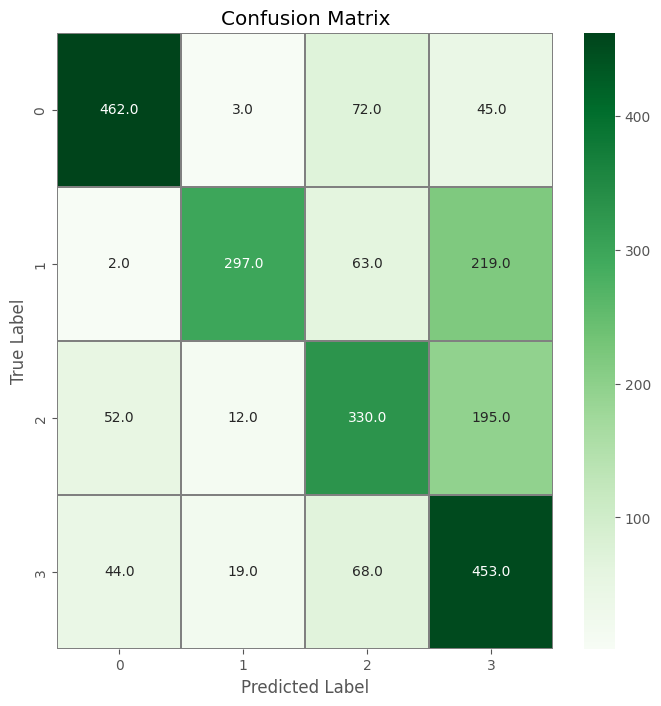

In [24]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       582
           1       0.90      0.51      0.65       581
           2       0.62      0.56      0.59       589
           3       0.50      0.78      0.61       584

    accuracy                           0.66      2336
   macro avg       0.71      0.66      0.66      2336
weighted avg       0.71      0.66      0.66      2336

